In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Activation, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('DIS.csv', header= None, index_col= None, delimiter= ',')
df[5].values.reshape(-1,1)

array([[ 17.804647],
       [ 17.198397],
       [ 17.677013],
       ...,
       [102.703629],
       [102.959648],
       [102.624855]])

In [3]:
def create_dataset(dataset, look_back= 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i: (i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
np.random.seed(42)
dataset = df[5].values.reshape(-1,1)

In [5]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

In [6]:
dataset, dataset.shape

(array([[0.06413303],
        [0.05843065],
        [0.0629325 ],
        ...,
        [0.86269207],
        [0.86510018],
        [0.86195112]]),
 (5035, 1))

In [7]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [8]:
train, train.shape

(array([[0.06413303],
        [0.05843065],
        [0.0629325 ],
        ...,
        [0.1692534 ],
        [0.1690956 ],
        [0.16712256]]),
 (2517, 1))

In [9]:
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# Reshape input to be [samples, time steps, features
trainX = np.reshape(trainX, newshape= (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, newshape= (testX.shape[0], 1, testX.shape[1]))

In [11]:
trainX.shape

(2276, 1, 240)

In [12]:
def plot_prediction(trainX, trainY, testX, testY, model) :
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)

    

In [14]:
# Create an fit the LSTM network 
model = tf.keras.Sequential()
model.add(LSTM(units= 25, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer= tf.keras.optimizers.Adam()
)
history = model.fit(trainX, trainY, epochs= 1000, batch_size= 240, verbose= 1)

Epoch 1/1000
10/10 [==============================] - 3s 4ms/step - loss: 0.0033
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.3362e-04
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.5152e-04
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.3519e-04
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.9374e-04
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.6748e-04
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 2.2551e-04
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.0868e-04
Epoch 11/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.9366e-04
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - lo

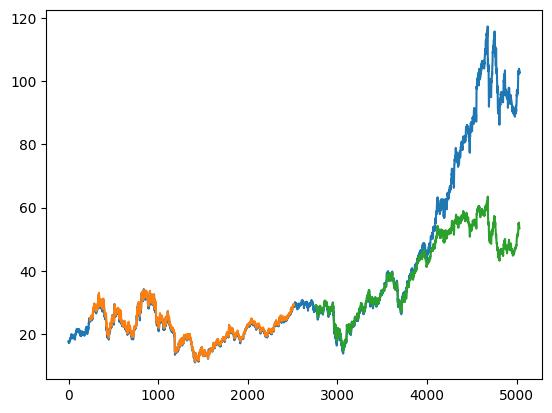

In [15]:
plot_prediction(trainX, trainY, testX, testY, model)
plt.savefig("Model_0_result.png")


In [16]:
model1 = tf.keras.Sequential()
model1.add(LSTM(25, input_shape=(1, look_back)))
model1.add(Dropout(0.1))
model1.add(Dense(1))
model1.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer= tf.keras.optimizers.Adam())
history_1 = model1.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
10/10 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 2/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 7.1112e-04
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 5.8962e-04
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 4.9710e-04
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 4.6078e-04
Epoch 8/1000
10/10 [==============================] - 0s 7ms/step - loss: 4.0770e-04
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 3.8031e-04
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 3.5015e-04
Epoch 11/1000
10/10 [==============================] - 0s 6ms/step - loss: 3.2960e-04
Epoch 12/1000
10/10 [==============================] - 0s 6ms/step - loss: 

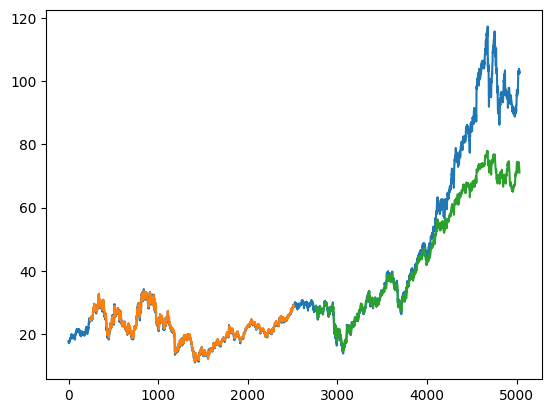

In [17]:
plot_prediction(trainX, trainY, testX, testY, model1)
plt.savefig("Model_1_result.png")


In [18]:
model2 = tf.keras.Sequential()
model2.add(LSTM(25, input_shape=(1, look_back), kernel_regularizer= tf.keras.regularizers.l2(0.01)))
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer= tf.keras.optimizers.Adam())
history_2 = model2.fit(trainX, trainY, epochs=500, batch_size=240, verbose=1)

Epoch 1/500
10/10 [==============================] - 2s 14ms/step - loss: 1.2906
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0173
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.7918
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6099
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4657
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3529
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2653
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1980
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1466
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1076
Epoch 11/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0784
Epoch 12/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0566
Epoch 13/500
10/10 [================

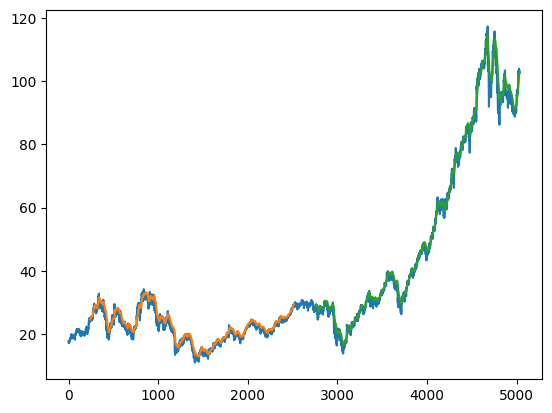

In [19]:
plot_prediction(trainX, trainY, testX, testY, model2)
plt.savefig("Model_2_result.png")


In [20]:
model.save('MyModel/model.h5')
model1.save('MyModel/model_1.h5')
model2.save('MyModel/model_2.h5')